# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()



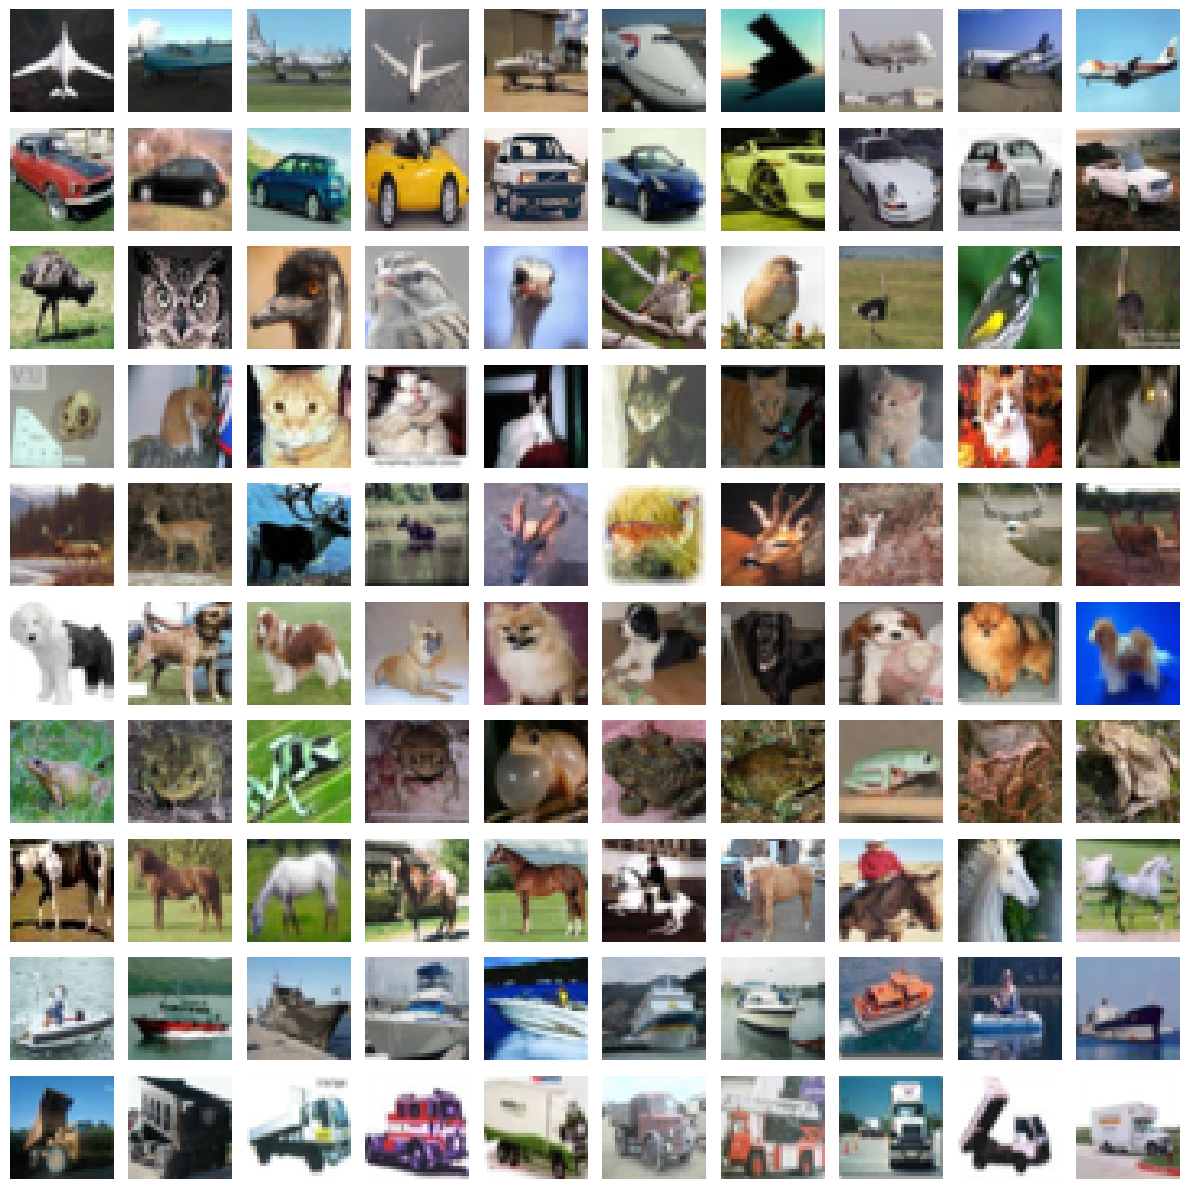

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck"]

# Plot 10 random images from each class
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
for i in range(10):
    for j, idx in enumerate(np.random.choice(np.where(y_train.flatten() == i)[0], 10, replace=False)):
        axes[i, j].imshow(x_train[idx])
        axes[i, j].axis("off")
    axes[i, 0].set_ylabel(class_names[i], fontsize=10, rotation=90)

plt.tight_layout()
plt.show()

# One-hot encode labels & normalize images
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to [0,1]



## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [12]:
from keras.backend import clear_session
clear_session()

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Define the model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')  # Softmax for multi-class classification
])

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [14]:
# Compile the model
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.1292 - loss: 2.2886 - val_accuracy: 0.2071 - val_loss: 2.2351
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2203 - loss: 2.2059 - val_accuracy: 0.2766 - val_loss: 2.1241
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2761 - loss: 2.0929 - val_accuracy: 0.3076 - val_loss: 2.0172
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3110 - loss: 1.9931 - val_accuracy: 0.3313 - val_loss: 1.9448
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3271 - loss: 1.9366 - val_accuracy: 0.3415 - val_loss: 1.9042
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3405 - loss: 1.8913 - val_accuracy: 0.3376 - val_loss: 1.8756
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3508 - loss: 1.8613 - val_accuracy: 0.3511 - val_loss: 1.8520
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3580 - loss: 1.8411 - val_accuracy: 0.3631 - v

*   Plot the cross entropy loss curve and the accuracy curve

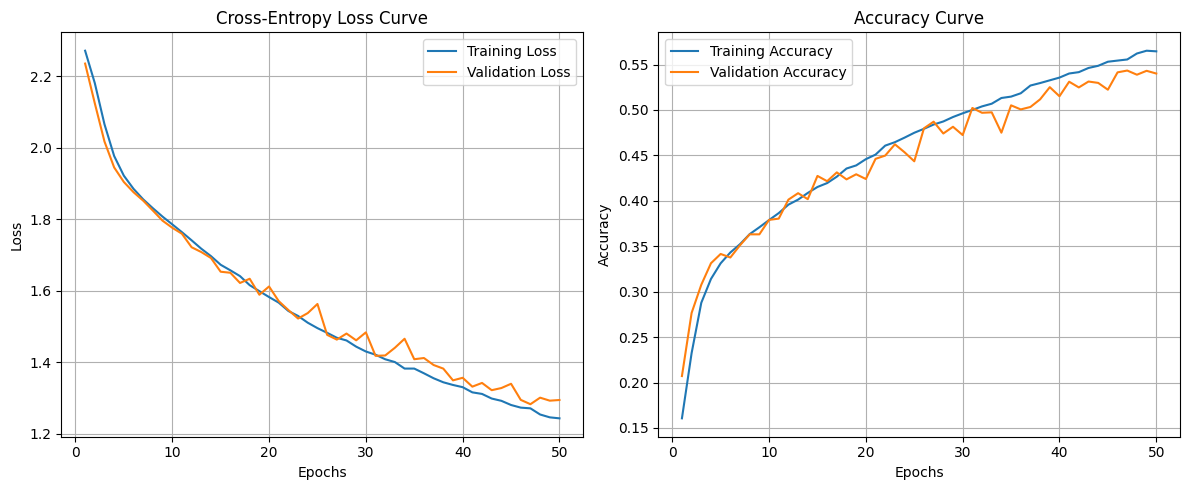

In [15]:
# Your code here :
import matplotlib.pyplot as plt

# Extract training & validation loss/accuracy from history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Plot Loss Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Cross-Entropy Loss Curve")
plt.legend()
plt.grid()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label="Training Accuracy")
plt.plot(epochs, val_accuracy, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [16]:
from keras.backend import clear_session
clear_session()

In [17]:
# Your code here :
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


# Define VGG-style CNN model
model_2 = models.Sequential([
    # First Conv Block: 2 Conv Layers + MaxPooling
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),  # Downsampling

    # Flatten feature maps
    layers.Flatten(),

    # Fully connected layer before classification
    layers.Dense(128, activation='relu'),

    # Output layer with 10 classes
    layers.Dense(10, activation='softmax')
])




*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [18]:
# Your code here :
model_2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=['accuracy']
)

# Train the model for 50 epochs with batch size 512
history_2 = model_2.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

# Evaluate on test data
test_loss, test_acc = model_2.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.1342 - loss: 2.2824 - val_accuracy: 0.2375 - val_loss: 2.1817
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2403 - loss: 2.1334 - val_accuracy: 0.2789 - val_loss: 2.0308
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2887 - loss: 2.0061 - val_accuracy: 0.3191 - val_loss: 1.9331
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3186 - loss: 1.9359 - val_accuracy: 0.3331 - val_loss: 1.8710
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3416 - loss: 1.8742 - val_accuracy: 0.3445 - val_loss: 1.8427
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3610 - loss: 1.8198 - val_accuracy: 0.3664 - val_loss: 1.7760
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3769 - loss: 1.7773 - val_accuracy: 0.3739 - val_loss: 1.7743
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3870 - loss: 1.7413 - val_accuracy: 0.3894 - 

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


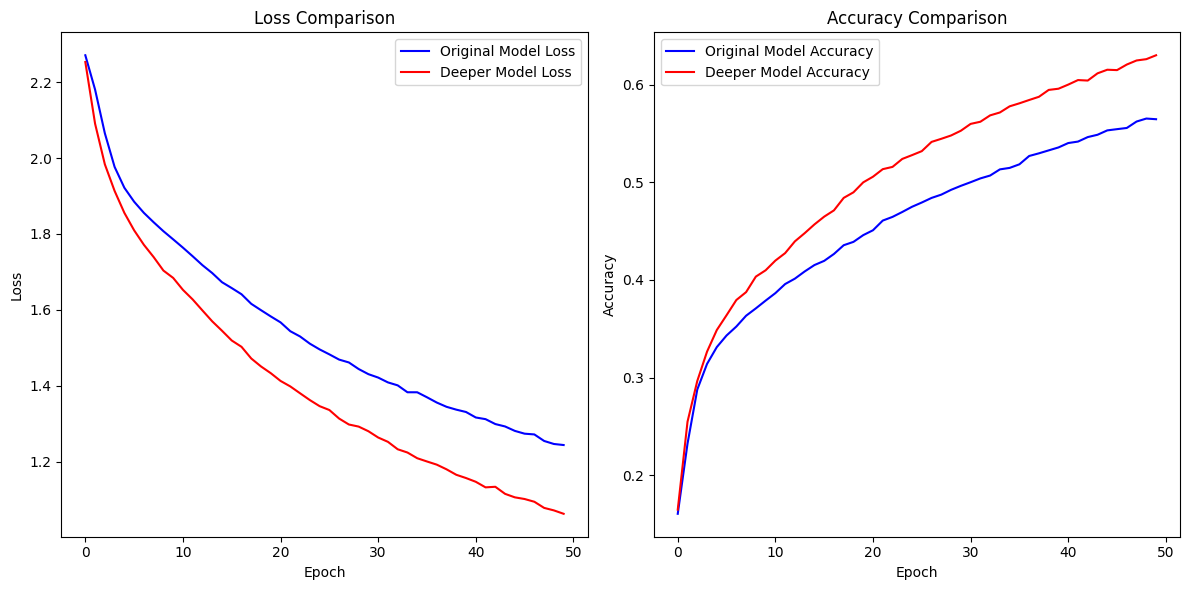

In [19]:
# Your code here :
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD

# Plot the loss curves for both models
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Original Model Loss', color='blue')
plt.plot(history_2.history['loss'], label='Deeper Model Loss', color='red')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy curves for both models
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Original Model Accuracy', color='blue')
plt.plot(history_2.history['accuracy'], label='Deeper Model Accuracy', color='red')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



**Comment on the observation**

the deeper is better
...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


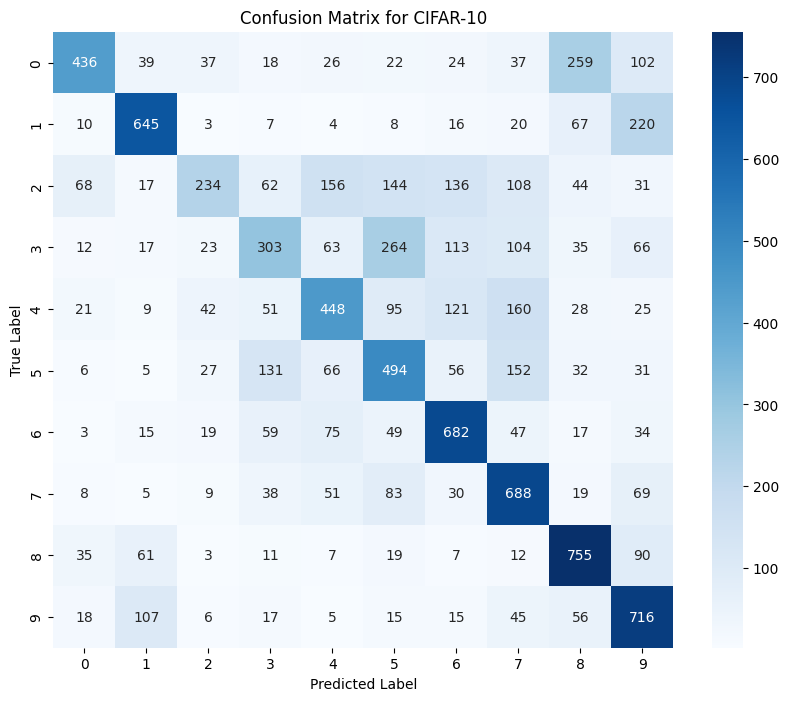

Class airplane: Predicted as airplane with 436 occurrences.
Class automobile: Predicted as automobile with 645 occurrences.
Class bird: Predicted as bird with 234 occurrences.
Class cat: Predicted as cat with 303 occurrences.
Class deer: Predicted as deer with 448 occurrences.
Class dog: Predicted as dog with 494 occurrences.
Class frog: Predicted as frog with 682 occurrences.
Class horse: Predicted as horse with 688 occurrences.
Class ship: Predicted as ship with 755 occurrences.
Class truck: Predicted as truck with 716 occurrences.


In [20]:
# Your code here :
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# Predict the labels for the test set
y_pred = model.predict(x_test, batch_size=512)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CIFAR-10')
plt.show()


**Comment here :**

Class airplane: Predicted as airplane with 436 occurrences.
Class automobile: Predicted as automobile with 645 occurrences.
Class bird: Predicted as bird with 234 occurrences.
Class cat: Predicted as cat with 303 occurrences.
Class deer: Predicted as deer with 448 occurrences.
Class dog: Predicted as dog with 494 occurrences.
Class frog: Predicted as frog with 682 occurrences.
Class horse: Predicted as horse with 688 occurrences.
Class ship: Predicted as ship with 755 occurrences.
Class truck: Predicted as truck with 716 occurrences.
...

*    Print the test accuracy for the trained model.

In [21]:
# Your code here :

# Evaluate the deeper model on the test set
test_loss_deeper, test_acc_deeper = model.evaluate(x_test, y_test)
print(f"Test accuracy of the deeper model: {test_acc_deeper}")

test_loss_deeper2, test_acc_deeper2 = model_2.evaluate(x_test, y_test)
print(f"Test accuracy of the deeper model: {test_acc_deeper2}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5437 - loss: 1.2933
Test accuracy of the deeper model: 0.5400999784469604
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5848 - loss: 1.1804
Test accuracy of the deeper model: 0.5785999894142151


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [22]:
from keras.backend import clear_session
clear_session()

In [5]:
# Your code here :
import tensorflow as tf
from tensorflow.keras import layers, models

def vgg_model():
    model = models.Sequential()

    # First block: Two convolutional layers with 64 filters, followed by max-pooling
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Second block: Two convolutional layers with 128 filters, followed by max-pooling
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Third block: Two convolutional layers with 256 filters, followed by max-pooling
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output of the convolutional layers
    model.add(layers.Flatten())

    # Fully connected layer with 128 units
    model.add(layers.Dense(128, activation='relu'))

    # Output layer with 10 units for CIFAR-10 classes and softmax activation
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with SGD optimizer and categorical crossentropy loss
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

    return model

# Instantiate and summarize the model
model = vgg_model()
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,671,114 (6.37 MB)

 Trainable params: 1,671,114 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [6]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Instantiate the VGG model
model = vgg_model()

# Train the model for 10 epochs with a batch size of 512
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

# Predict the labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for CIFAR-10')
plt.show()


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 268ms/step - accuracy: 0.1024 - loss: 2.3017 - val_accuracy: 0.1171 - val_loss: 2.2990
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.1262 - loss: 2.2979 - val_accuracy: 0.1461 - val_loss: 2.2941
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.1584 - loss: 2.2921 - val_accuracy: 0.1842 - val_loss: 2.2828
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.1856 - loss: 2.2766 - val_accuracy: 0.2288 - val_loss: 2.2414
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.2314 - loss: 2.2109 - val_accuracy: 0.2051 - val_loss: 2.1630
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.2370 - loss: 2.1051 - val_accuracy: 0.2775 - val_loss: 1.9956
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.2727 - loss: 2.0233 - val_accuracy: 0.2725 - val_loss: 2.0212
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.2896 - loss: 1.9778 - val_accuracy: 0.3

NameError: name 'np' is not defined

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

To aid neural networks in learning intricate patterns, introduce non-linearity.

 ReLU: Prevents vanishing gradients and works best for concealed layers.

 Sigmoid: For binary classification.

 Softmax: Produces probability for multi-class classification.

_

2 - Key Differences between sigmoid and softmax:

Sigmoid: Used for binary classification, each value is independent.

 Softmax: Used for multi-class classification, outputs add up to 1.

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

 For binary classification, use binary cross-entropy.

 For multi-class classification, use categorical cross-entropy.

_
